In [73]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
# Load the dataset
data_path = './pro_admits_cleaned_data.csv'
df_admitsFYI = pd.read_csv(data_path)

In [44]:
df_admitsFYI

,University,Status,Target Major,GRE Verbal,GRE Quantitative,GRE Writing,GRE Total,UG College,UG Major,GPA,Papers,Work Exp,Season,Year,TOEFL,IELTS
0,Bowling Green State University,0,Computer Science,135.0,146.0,3.0,281.0,SIES Graduate School of Technology,Information Technology,2.2400,0.0,0,Fall,2015,0.0,6.0
1,Bowling Green State University,1,Computer Science,170.0,147.0,4.0,317.0,thapathali engineering campus,ECE,2.9920,0.0,0,Spring,2017,100.0,0.0
2,Bowling Green State University,0,Computer Science,148.0,133.0,3.0,281.0,Vellore Institute of Technology,Computer Science,2.8920,0.0,0,Fall,2016,0.0,6.5
3,Bowling Green State University,1,Computer Science,147.0,136.0,2.0,283.0,Gitam University,Computer Science,2.8000,0.0,0,Spring,2016,0.0,6.0
4,Bowling Green State University,1,Computer Science,154.0,144.0,3.5,298.0,"Institute of Engineering & Science, IPS Academy",Computer Science,2.8040,0.0,0,Fall,2017,97.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33851,Governors State University,1,Computer Science,150.0,142.0,2.5,292.0,"Audisankara Institute of Technology, ASIT",ECE,2.6400,0.0,0,Fall,2017,0.0,6.0
33852,Governors State University,1,Computer Science,155.0,130.0,3.0,285.0,Vignan Institute Of Technology And Science,Computer Science,2.8800,0.0,0,Fall,2019,0.0,6.5
33853,Governors State University,1,Computer Science,143.0,133.0,3.0,276.0,"Jawaharlal Nehru Institute of Technology, Hyde...",Computer Science,2.6000,0.0,0,Fall,2019,0.0,6.0
33854,Governors State University,1,Computer Science,142.0,133.0,2.5,275.0,svist,Computer Science,2.4452,0.0,0,Fall,2019,0.0,6.0


# Unsupervised Learning

Based on the summary provided, where you're interested in exploring unsupervised learning techniques, here's a list of methods you could try out:

1. Clustering (grouping instance together):
- K-Means (K = # of clusters you wanna group)
- DBSCAN
- Agglomerative Clustering
2. Dimensionality Reduction:
- PCA (Principal Component Analysis)
3. Anomaly Detection:
- Isolation Forest
    - Isolation Forest is primarily used for anomaly detection rather than classification, so it doesn't directly output precision, recall, and accuracy metrics. However, you can use it for anomaly detection and then evaluate its performance using other metrics such as the area under the Receiver Operating Characteristic (ROC) curve (AUC-ROC), precision, and recall if you have labeled data.
- One-Class SVM


In [45]:
#import 
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [46]:
def print_score(accuracy, precision, recall):
    print(f"Model Accuracy: {accuracy:.2%}")
    print(f"Model Precision: {precision:.2%}")
    print(f"Model Recall: {recall:.2%}")

# Clustering
## K-means
\# of clusters you wanna group by finding the centroid for all K-clusters and group them based on the distance 

In [47]:
# Extracting the columns of interest
X = df_admitsFYI[['GPA', 'GRE Total', 'TOEFL', 'Work Exp', 'Papers']].copy()

# Define the number of clusters
n_clusters = 3  # You can adjust this number based on your data and requirements

# Initialize the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

# Fit the model to your data
kmeans.fit(X)

# Assign clusters to the data points
clusters = kmeans.labels_

# Add the cluster labels to the DataFrame
df_admitsFYI['Cluster'] = clusters

# Print cluster centers
# print("Cluster centers:")
# print(kmeans.cluster_centers_)

# Ground truth labels (actual admission status)
y_true = df_admitsFYI['Status']  # Assuming 'Status' column contains the ground truth labels

# Predicted labels (cluster assignments)
y_pred = df_admitsFYI['Cluster']  # Assuming 'Cluster' column contains the predicted labels from KMeans

# Compute precision
precision = precision_score(y_true, y_pred, average='weighted')  # You can adjust the average parameter if needed

# Compute recall
recall = recall_score(y_true, y_pred, average='weighted')  # You can adjust the average parameter if needed

# Compute accuracy
accuracy = accuracy_score(y_true, y_pred)

print_score(accuracy, precision, recall)

Model Accuracy: 45.82%
Model Precision: 50.19%
Model Recall: 45.82%


/Users/jason.gautama/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## DBSCAN | density-based clustering non-parametric algorithm
Density-based clustering is a type of clustering algorithm that identifies clusters based on the density of data points in the feature space. Unlike centroid-based methods like k-means, density-based algorithms don't require specifying the number of clusters beforehand and can identify clusters of arbitrary shapes and sizes. 

In [86]:
from sklearn.cluster import DBSCAN

# Extracting the columns of interest
X = df_admitsFYI[['GPA', 'GRE Total', 'TOEFL', 'Work Exp', 'Papers']].copy()

# Initialize the DBSCAN model
## eps = The maximum distance between two samples for one to be considered as in the neighborhood of the other.
## min_samples = The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. 
dbscan = DBSCAN(eps=0.5, min_samples=50)  # You need to adjust parameters according to your data

# Fit the model to your data
dbscan.fit(X)

# Assign clusters to the data points
clusters = dbscan.labels_

# Assuming you have ground truth labels (actual admission status)
y_true = df_admitsFYI['Status']  # Replace 'Status' with the appropriate column name

# Assuming you want to convert DBSCAN's cluster assignments to binary labels for evaluation
# Here, we consider outliers (-1) as a separate class
y_pred = [1 if label != -1 else 0 for label in clusters]

# Compute precision
precision = precision_score(y_true, y_pred)

# Compute recall
recall = recall_score(y_true, y_pred)

# Compute accuracy
accuracy = accuracy_score(y_true, y_pred)

print_score(accuracy, precision, recall)

Model Accuracy: 42.06%
Model Precision: 71.71%
Model Recall: 19.56%


https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

In [87]:
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 54
Estimated number of noise points: 27787


### Clustering without DBSCAN

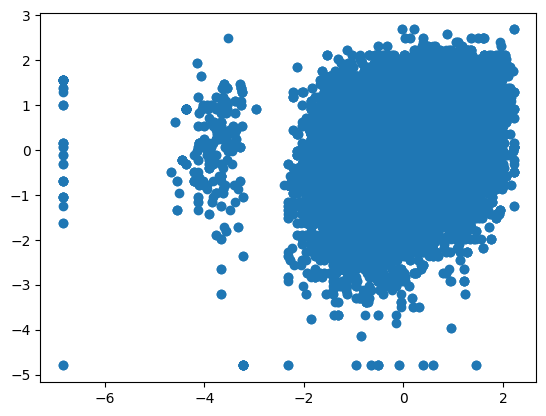

In [88]:
from sklearn.preprocessing import StandardScaler
X_fit = StandardScaler().fit_transform(X)
X_fit

plt.scatter(X_fit[:, 0], X_fit[:, 1])
plt.show()

### DBSCAN
the black color instances show outlier

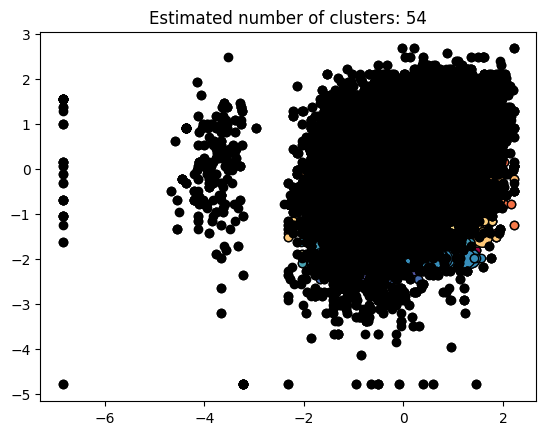

In [90]:
import numpy as np
import matplotlib.pyplot as plt

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# print(unique_labels, "\n", core_samples_mask, "\n", colors)

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k
    
    xy = X_fit[class_member_mask & core_samples_mask]
    type(xy)
    if len(xy) > 0:
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )

    xy = X_fit[class_member_mask & ~core_samples_mask]
    if len(xy) > 0:
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

# Dimensionality Reduction
## Agglomerative Clustering

Agglomerative clustering is a hierarchical clustering technique used in unsupervised machine learning to group similar data points together. Unlike partitioning methods like k-means, agglomerative clustering starts with each data point as its own cluster and iteratively merges clusters based on their similarity until a stopping criterion is met.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Extracting the columns of interest
X = df_admitsFYI[['GPA', 'GRE Total', 'TOEFL', 'Work Exp', 'Papers']].copy()

# Initialize the Agglomerative Clustering model
agg_clustering = AgglomerativeClustering(n_clusters=2)  # You need to adjust the number of clusters according to your data

# Fit the model to your data
clusters = agg_clustering.fit_predict(X)

# Assuming you have ground truth labels (actual admission status)
y_true = df_admitsFYI['Status']  # Replace 'Status' with the appropriate column name

# Assuming you want to convert Agglomerative Clustering's cluster assignments to binary labels for evaluation
# You may need to adjust this based on your clustering results
y_pred = clusters

# Compute precision
precision = precision_score(y_true, y_pred)

# Compute recall
recall = recall_score(y_true, y_pred)

# Compute accuracy
accuracy = accuracy_score(y_true, y_pred)

print_score(accuracy, precision, recall)

Model Accuracy: 45.75%
Model Precision: 74.16%
Model Recall: 26.79%


## Principal Component Analysis
Principal Component Analysis (PCA) is a dimensionality reduction technique used in machine learning and data analysis to transform high-dimensional data into a new coordinate system called principal components. The goal of PCA is to find a lower-dimensional representation of the data while preserving as much of the original variance as possible.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Extracting the columns of interest
X = df_admitsFYI[['GPA', 'GRE Total', 'TOEFL', 'Work Exp', 'Papers']].copy()
y = df_admitsFYI['Status']  # Assuming 'Status' column contains the target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize PCA with the desired number of components
num_components = 5  # You can adjust this value based on your needs
pca = PCA(n_components=num_components)

# Fit PCA on the training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize and train a classifier (e.g., Logistic Regression) on the transformed data
classifier = LogisticRegression()  # You can use any classifier here
classifier.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test_pca)

# Compute precision
precision = precision_score(y_test, y_pred)

# Compute recall
recall = recall_score(y_test, y_pred)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

print_score(accuracy, precision, recall)

Model Accuracy: 66.07%
Model Precision: 66.12%
Model Recall: 99.87%


## One-Class SVM
One-Class SVM (Support Vector Machine) is a machine learning algorithm used for anomaly detection, particularly in situations where only one class of data (the "normal" class) is available for training. It belongs to the family of support vector machines but is designed specifically to model the distribution of the normal class and detect deviations from it.

In [ ]:
from sklearn.svm import OneClassSVM

# Extracting the columns of interest
X = df_admitsFYI[['GPA', 'GRE Total', 'TOEFL', 'Work Exp', 'Papers']].copy()

# Initialize One-Class SVM
one_class_svm = OneClassSVM(nu=0.1)  # Adjust nu parameter based on expected proportion of outliers

# Fit One-Class SVM to the data
one_class_svm.fit(X)

# Predict outliers/anomalies
y_pred = one_class_svm.predict(X)

# Convert predictions to binary labels (1 for inliers, -1 for outliers)
y_pred_binary = [1 if label == 1 else 0 for label in y_pred]

## TODO: we don't have anomaly status
# Assuming you have ground truth labels (actual anomaly status)
y_true = df_admitsFYI['Status']  # Replace 'AnomalyStatus' with the appropriate column name

# Compute precision
precision = precision_score(y_true, y_pred_binary)

# Compute recall
recall = recall_score(y_true, y_pred_binary)

# Accuracy is not typically used for anomaly detection since it heavily depends on the imbalance of the dataset
# However, you can compute it if you have a balanced dataset for anomaly detection
accuracy = accuracy_score(y_true, y_pred_binary)

print_score(accuracy, precision, recall)

Model Accuracy: 62.13%
Model Precision: 65.47%
Model Recall: 89.65%
